In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import torch
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import json
import os
import pickle
from pathlib import Path
import optuna
import wandb

os.environ["GCLOUD_PROJECT"] = "flowing-mantis-239216"

/pfs/data5/home/kit/stud/uloak/thesis/thesis/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
params = {
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.family": "serif",
    "font.sans-serif": [],
    "axes.labelsize": 11,
}
plt.rcParams.update(params)
rc("text", usetex=True)

CM = 1 / 2.54
# cmap = plt.cm.get_cmap("viridis")
cmap = mpl.colormaps.get_cmap("plasma")
# plt.style.use(['science','nature'])

# Bright color scheme
# color-blind safe
# from Paul Tot's website: https://personal.sron.nl/~pault/
# Set color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['4477AA', 'EE6677', '228833', 'CCBB44', '66CCEE', 'AA3377', 'BBBBBB'])


# Standard SciencePlots color cycle
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(
    "color", ["0C5DA5", "00B945", "FF9500", "FF2C00", "845B97", "474747", "9e9e9e"]
)


In [ ]:
# results_df = pd.read_csv("../data/results/learning_curves_gbm_default_params.csv")
# train_sizes = results_df.start.abs().unique()
# train_acc_uni = results_df[results_df.strategy == "uniform"].train_acc
# val_acc_uni = results_df[results_df.strategy == "uniform"].val_acc

# train_acc_exp = results_df[results_df.strategy == "exponential"].train_acc
# val_acc_exp = results_df[results_df.strategy == "exponential"].val_acc


In [ ]:
# # fig, axs = plt.subplot_mosaic("AB;CD", figsize=(10,10))

# fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12*CM, 6*CM), sharey=True, sharex=True, constrained_layout=True)

# ax1.plot(train_sizes, train_acc_uni, ".-", label="Train", color="C1")
# ax1.plot(train_sizes, val_acc_uni, ".-", label="Val", color="C0")


# ax2.plot(train_sizes, train_acc_exp, ".-", label="Train", color="C1")
# ax2.plot(train_sizes, val_acc_exp, ".-", label="Val", color="C0")

# # if not ax:
# #     ax=plt.gca()

# # ax.fill_between(
# #         train_sizes,
# #         train_acc + 0.02, # .mean(axis=1) - fit_times.std(axis=1),
# #         train_acc - 0.02, # fit_times.mean(axis=1) + fit_times.std(axis=1),
# #         alpha=0.3,
# #         color="C3",
# # )

# # ax.fill_between(
# #         train_sizes,
# #         val_acc + 0.02, # .mean(axis=1) - fit_times.std(axis=1),
# #         val_acc - 0.02, # fit_times.mean(axis=1) + fit_times.std(axis=1),
# #         alpha=0.3,
# # )

# # max
# xmax = train_sizes[np.argmax(val_acc_uni)]
# ymax = val_acc_uni.max()
# ax1.plot(xmax, ymax, ".", color="C3")
# ax1.text(xmax, ymax + 0.02, f"{ymax * 100 :.2f}\%",         horizontalalignment='center')
# #ax1.axvline(x=xmax, color="black", linestyle="--", linewidth=0.5)

# xmax = train_sizes[np.argmax(val_acc_exp)]
# ymax = val_acc_exp.max()
# ax2.plot(xmax, ymax, ".", color="C3")
# ax2.text(xmax, ymax + 0.02, f"{ymax * 100 :.2f}\%",         horizontalalignment='center')
# #ax2.axvline(x=xmax, color="black", linestyle="--", linewidth=0.5)

# ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
# ax2.xaxis.set_major_formatter(ticker.EngFormatter())
# # title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
# # plt.title(title, fontsize = 18, y = 1.03)
# ax1.legend(loc="lower right", frameon=False)
# ax2.legend(loc="lower right", frameon=False)
# plt.ylim(0.6, 1)
# # plt.show()

# ax1.set_title('(a) Uniform Weights')
# ax2.set_title('(b) Exponential Weights')
# # plt.tight_layout()
# # plt.ylabel("Accuracy")  # , fontsize = "small")
# # plt.xlabel("Number of Training Samples")  # , fontsize = "small")

# fig.supylabel('Accuracy')
# fig.supxlabel('Number of Training Samples')

# plt.savefig(
#     f"../reports/Graphs/learning-curves-gradient-boosting.pdf",
#     bbox_inches="tight",
# )


In [ ]:
# feature_importance_adv_val = pd.read_csv("../data/results/feature_importance_gbm_classical_size.csv")
# # feature_importance_adv_val.set_index("Feature Id", drop=True, inplace=True)
# # feature_importance_adv_val.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# feature_importance_adv_val["Feature Id"] = feature_importance_adv_val["Feature Id"].str.lower()

In [ ]:
# # feature_importance_adv_val.plot.bar(figsize=(12 * CM, 6 * CM))
# ax = feature_importance_adv_val.plot.bar(x='Feature Id', y='Importances', figsize=(12 * CM, 6 * CM))
# ax.set_ylabel("Feature Importance in \%")
# ax.set_xlabel("Feature")
# # ax.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))
# plt.legend(frameon=False)
# plt.savefig(
#     f"../reports/Graphs/adv-val-gradient-boosting.pdf",
#     bbox_inches="tight",
# )

In [ ]:
def to_mpl(start: str, end: str):
    mpl_start = mdates.date2num(pd.to_datetime(start))
    mpl_end = mdates.date2num(pd.to_datetime(end))
    return mpl_start, mpl_end - mpl_start


In [ ]:
def to_pos(span: tuple):
    return span[0] + 0.5 * span[1]


In [ ]:
fig, (ax, bx) = plt.subplots(
    2, 1, sharey="none", sharex="col", figsize=(12 * CM, 6 * CM)
)

# ise
ax.broken_barh([to_mpl("2005-05-02", "2017-05-31")], (1, 5), facecolors="#D6DCE5")

# ise pretraining
span = [to_mpl("2012-10-23", "2013-10-24")]
ax.broken_barh(span, (2.5, 1), facecolors="C0", edgecolor="black", linewidth=0.8)

ax.text(
    x=to_pos(span[0]),
    y=3,
    s="train",
    ha="center",
    va="center",
    color="black",
    fontsize="small",
)

spans = [
    to_mpl("2005-05-02", "2013-10-24"),
    to_mpl("2013-10-25", "2015-11-05"),
    to_mpl("2015-11-06", "2017-05-31"),
]

# ise supervised
ax.broken_barh(
    spans,
    (1.2, 1),
    facecolors=("C0", "C1", "C3"),
    edgecolor="black",
    linewidth=0.8,
)

# add text labels manually
labels = ["train", "val", "test"]
for i, s in enumerate(spans):
    ax.text(
        x=to_pos(s),
        y=1.7,
        s=labels[i],
        ha="center",
        va="center",
        color="black",
        fontsize="small",
    )

ax.xaxis_date()
plt.setp(ax.get_xticklabels(), visible=True)

# cboe
bx.broken_barh([to_mpl("2011-01-01", "2017-10-31")], (1, 2.5), facecolors="#D6DCE5")

spans = [
    to_mpl("2015-11-06", "2017-10-31"),
]

# cboe supervised
bx.broken_barh(
    spans,
    (1.85, 1),
    facecolors=("C3"),
    edgecolor="black",
    linewidth=0.8,
)

# add text labels manually
labels = ["test"]
for i, s in enumerate(spans):
    bx.text(
        x=to_pos(s),
        y=2.35,
        s=labels[i],
        ha="center",
        va="center",
        color="black",
        fontsize="small",
    )



# Modify y-axis tick labels
ax.set_yticks([1.7, 3], labels=["ISE Supervised", "ISE Pretraining"])
bx.set_yticks([2.35], labels=["CBOE Transfer"])

ax.set_ylim(1, 3.7)
bx.set_ylim(1, 3.7)

# into to date
bx.xaxis_date()

plt.xlabel("Date")

# plt.show()
plt.savefig("../reports/Graphs/train-test-split.pdf", bbox_inches="tight")


In [ ]:
print(plt.rcParams["axes.linewidth"])


In [ ]:
# code from https://d2l.ai/d2l-en.pdf
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap=cmap):
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = plt.subplots(
        num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False
    )
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes)
    plt.savefig("../reports/Graphs/attention-maps.pdf", bbox_inches="tight")


In [ ]:
# attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
attention_weights = torch.rand(size=(2, 4, 10, 10))
show_heatmaps(
    attention_weights, xlabel="Keys", ylabel="Queries", figsize=(12 * CM, 6 * CM)
)


In [ ]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return pos_encoding


In [ ]:
tokens = 64
dimensions = 96


pos_encoding = positional_encoding(tokens, dimensions)
print(pos_encoding.shape)

plt.figure(figsize=(12 * CM, 6 * CM))
plt.pcolormesh(pos_encoding[0], cmap=cmap)
plt.xlabel("Embedding dimension $d_e$")
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel("token position $t$")
plt.colorbar()
plt.savefig("../reports/Graphs/positional-encoding.pdf", bbox_inches="tight")


## Gradient Boosting

In [108]:
# set study globally here
# study = "30sl6vqf.optuna:v49"
# model = "30sl6vqf_CatBoostClassifier_default.cbm:v5"

# models = [
#     ("classical", "30sl6vqf_CatBoostClassifier_default.cbm:v5"),
#     ("classical-size", "2w28suql_CatBoostClassifier_default.cbm:v7"),
#     ("ml", "2zglfgfb_CatBoostClassifier_default.cbm:v4"),
# ]
study = "30sl6vqf.optuna:v49"

# study = "2w28suql.optuna:v49"


In [109]:
# see https://wandb.ai/fbv/thesis/runs/kwlaw02g/overview?workspace=user-karelze
run = wandb.init(project="thesis", entity="fbv")

# model_name = model.split("/")[-1].split(":")[0]
# study_id = model_name.split("_")[0]

study_id = study.split(".")[0]


artifact = run.use_artifact(study)
study_dir = artifact.download()

# artifact = run.use_artifact(model)
# model_dir = artifact.download()

study_name, version = study.split(":")

wandb:   1 of 1 files downloaded.  


In [110]:
file  = open(f"./artifacts/{study_id}.optuna:{version}/{study_id}.optuna",'rb')
study = pickle.load(file)

sampler = study.sampler
storage = f"sqlite:///../{study_id}.db"

study = optuna.load_study(study_name=study_id, storage=storage,sampler=sampler)

In [111]:
LUT_LABELS = {"Objective Value": "Accuracy", "bagging_temperature": "Bagging Temp.", "depth":"Depth", "l2_leaf_reg": "$\ell_2$ Leaf Reg." , "learning_rate" : "$\lambda$", "random_strength": "Rand. Str.", "":""}

In [112]:
from typing import Callable
from typing import Dict
from typing import List
from typing import Optional
from typing import Sequence
from typing import Tuple
from typing import Union

import numpy as np

from optuna._experimental import experimental_func
from optuna._imports import try_import
from optuna.logging import get_logger
from optuna.study import Study
from optuna.trial import FrozenTrial
from optuna.visualization._contour import _AxisInfo
from optuna.visualization._contour import _ContourInfo
from optuna.visualization._contour import _get_contour_info
from optuna.visualization._contour import _SubContourInfo
from optuna.visualization.matplotlib._matplotlib_imports import _imports


with try_import() as _optuna_imports:
    import scipy

if _imports.is_successful():
    from optuna.visualization.matplotlib._matplotlib_imports import Axes
    from optuna.visualization.matplotlib._matplotlib_imports import Colormap
    from optuna.visualization.matplotlib._matplotlib_imports import ContourSet
    from optuna.visualization.matplotlib._matplotlib_imports import plt

_logger = get_logger(__name__)


CONTOUR_POINT_NUM = 100


def plot_contour(
    study: Study,
    params: Optional[List[str]] = None,
    *,
    target: Optional[Callable[[FrozenTrial], float]] = None,
    target_name: str = "Objective Value",
) -> "Axes":
    """Plot the parameter relationship as contour plot in a study with Matplotlib.

    Note that, if a parameter contains missing values, a trial with missing values is not plotted.

    .. seealso::
        Please refer to :func:`optuna.visualization.plot_contour` for an example.

    Warnings:
        Output figures of this Matplotlib-based
        :func:`~optuna.visualization.matplotlib.plot_contour` function would be different from
        those of the Plotly-based :func:`~optuna.visualization.plot_contour`.

    Example:

        The following code snippet shows how to plot the parameter relationship as contour plot.

        .. plot::

            import optuna


            def objective(trial):
                x = trial.suggest_float("x", -100, 100)
                y = trial.suggest_categorical("y", [-1, 0, 1])
                return x ** 2 + y


            sampler = optuna.samplers.TPESampler(seed=10)
            study = optuna.create_study(sampler=sampler)
            study.optimize(objective, n_trials=30)

            optuna.visualization.matplotlib.plot_contour(study, params=["x", "y"])

    Args:
        study:
            A :class:`~optuna.study.Study` object whose trials are plotted for their target values.
        params:
            Parameter list to visualize. The default is all parameters.
        target:
            A function to specify the value to display. If it is :obj:`None` and ``study`` is being
            used for single-objective optimization, the objective values are plotted.

            .. note::
                Specify this argument if ``study`` is being used for multi-objective optimization.
        target_name:
            Target's name to display on the color bar.

    Returns:
        A :class:`matplotlib.axes.Axes` object.

    .. note::
        The colormap is reversed when the ``target`` argument isn't :obj:`None` or ``direction``
        of :class:`~optuna.study.Study` is ``minimize``.
    """

    _imports.check()
    info = _get_contour_info(study, params, target, target_name)
    return _get_contour_plot(info)



def _get_contour_plot(info: _ContourInfo) -> "Axes":

    sorted_params = info.sorted_params
    sub_plot_infos = info.sub_plot_infos
    reverse_scale = info.reverse_scale
    target_name = info.target_name

    if len(sorted_params) <= 1:
        _, ax = plt.subplots()
        return ax
    n_params = len(sorted_params)

    if n_params == 2:
        # Set up the graph style.
        fig, axs = plt.subplots()
        cmap = _set_cmap(reverse_scale)

        cs = _generate_contour_subplot(sub_plot_infos[0][0], axs, cmap)
        if isinstance(cs, ContourSet):
            axcb = fig.colorbar(cs)
            axcb.set_label("Accuracy")
    else:
        # Set up the graph style.
        fig, axs = plt.subplots(n_params, n_params, figsize=(15 *CM, 15 *CM))
        cmap = _set_cmap(reverse_scale)

        # Prepare data and draw contour plots.
        cs_list = []
        for x_i in range(len(sorted_params)):
            for y_i in range(len(sorted_params)):
                ax = axs[y_i, x_i]
                cs = _generate_contour_subplot(sub_plot_infos[y_i][x_i], ax, cmap)
                if isinstance(cs, ContourSet):
                    cs_list.append(cs)
        if cs_list:
            axcb = fig.colorbar(cs_list[0], ax=axs, aspect=50)
            axcb.set_label("Accuracy")

    return axs


def _set_cmap(reverse_scale: bool) -> "Colormap":
    cmap = "viridis_r" if not reverse_scale else "virids"
    return plt.get_cmap(cmap)


class _LabelEncoder:
    def __init__(self) -> None:
        self.labels: List[str] = []

    def fit(self, labels: List[str]) -> "_LabelEncoder":
        self.labels = sorted(set(labels))
        return self

    def transform(self, labels: List[str]) -> List[int]:
        return [self.labels.index(label) for label in labels]

    def fit_transform(self, labels: List[str]) -> List[int]:
        return self.fit(labels).transform(labels)

    def get_labels(self) -> List[str]:
        return self.labels

    def get_indices(self) -> List[int]:
        return list(range(len(self.labels)))


def _calculate_griddata(
    xaxis: _AxisInfo,
    yaxis: _AxisInfo,
    z_values_dict: Dict[Tuple[int, int], float],
) -> Tuple[
    np.ndarray,
    np.ndarray,
    np.ndarray,
    List[int],
    List[str],
    List[int],
    List[str],
    List[Union[int, float]],
    List[Union[int, float]],
]:

    x_values = []
    y_values = []
    z_values = []
    for x_value, y_value in zip(xaxis.values, yaxis.values):
        if x_value is not None and y_value is not None:
            x_values.append(x_value)
            y_values.append(y_value)
            x_i = xaxis.indices.index(x_value)
            y_i = yaxis.indices.index(y_value)
            z_values.append(z_values_dict[(x_i, y_i)])

    # Return empty values when x or y has no value.
    if len(x_values) == 0 or len(y_values) == 0:
        return np.array([]), np.array([]), np.array([]), [], [], [], [], [], []

    def _calculate_axis_data(
        axis: _AxisInfo,
        values: Sequence[Union[str, float]],
    ) -> Tuple[np.ndarray, List[str], List[int], List[Union[int, float]]]:

        # Convert categorical values to int.
        cat_param_labels = []  # type: List[str]
        cat_param_pos = []  # type: List[int]
        returned_values: Sequence[Union[int, float]]
        if axis.is_cat:
            enc = _LabelEncoder()
            returned_values = enc.fit_transform(list(map(str, values)))
            cat_param_labels = enc.get_labels()
            cat_param_pos = enc.get_indices()
        else:
            returned_values = list(map(lambda x: float(x), values))

        # For x and y, create 1-D array of evenly spaced coordinates on linear or log scale.
        if axis.is_log:
            ci = np.logspace(np.log10(axis.range[0]), np.log10(axis.range[1]), CONTOUR_POINT_NUM)
        else:
            ci = np.linspace(axis.range[0], axis.range[1], CONTOUR_POINT_NUM)

        return ci, cat_param_labels, cat_param_pos, list(returned_values)

    xi, cat_param_labels_x, cat_param_pos_x, transformed_x_values = _calculate_axis_data(
        xaxis,
        x_values,
    )
    yi, cat_param_labels_y, cat_param_pos_y, transformed_y_values = _calculate_axis_data(
        yaxis,
        y_values,
    )

    # Calculate grid data points.
    zi: np.ndarray = np.array([])
    # Create irregularly spaced map of trial values
    # and interpolate it with Plotly's interpolation formulation.
    if xaxis.name != yaxis.name:
        zmap = _create_zmap(transformed_x_values, transformed_y_values, z_values, xi, yi)
        zi = _interpolate_zmap(zmap, CONTOUR_POINT_NUM)

    return (
        xi,
        yi,
        zi,
        cat_param_pos_x,
        cat_param_labels_x,
        cat_param_pos_y,
        cat_param_labels_y,
        transformed_x_values,
        transformed_y_values,
    )


def _generate_contour_subplot(info: _SubContourInfo, ax: "Axes", cmap: "Colormap") -> "ContourSet":

    if len(info.xaxis.indices) < 2 or len(info.yaxis.indices) < 2:
        ax.label_outer()
        return ax

    # replace with lut values
    ax.set(xlabel=LUT_LABELS[info.xaxis.name], ylabel=LUT_LABELS[info.yaxis.name])
    ax.set_xlim(info.xaxis.range[0], info.xaxis.range[1])
    ax.set_ylim(info.yaxis.range[0], info.yaxis.range[1])

    if info.xaxis.name == info.yaxis.name:
        ax.label_outer()
        return ax

    (
        xi,
        yi,
        zi,
        x_cat_param_pos,
        x_cat_param_label,
        y_cat_param_pos,
        y_cat_param_label,
        x_values,
        y_values,
    ) = _calculate_griddata(info.xaxis, info.yaxis, info.z_values)
    cs = None
    if len(zi) > 0:
        if info.xaxis.is_log:
            ax.set_xscale("log")
        if info.yaxis.is_log:
            ax.set_yscale("log")
        if info.xaxis.name != info.yaxis.name:
            # Contour the gridded data.
            ax.contour(xi, yi, zi, 15, linewidths=0.5, colors="k")
            cs = ax.contourf(xi, yi, zi, 15, cmap=cmap.reversed())
            # Plot data points.
            ax.scatter(
                x_values,
                y_values,
                marker="o",
                c="black",
                s=20,
                edgecolors="grey",
                linewidth=2.0,
            )
    if info.xaxis.is_cat:
        ax.set_xticks(x_cat_param_pos)
        ax.set_xticklabels(x_cat_param_label)
    if info.yaxis.is_cat:
        ax.set_yticks(y_cat_param_pos)
        ax.set_yticklabels(y_cat_param_label)
    ax.label_outer()
    return cs


def _create_zmap(
    x_values: List[Union[int, float]],
    y_values: List[Union[int, float]],
    z_values: List[float],
    xi: np.ndarray,
    yi: np.ndarray,
) -> Dict[Tuple[int, int], float]:

    # Creates z-map from trial values and params.
    # z-map is represented by hashmap of coordinate and trial value pairs.
    #
    # Coordinates are represented by tuple of integers, where the first item
    # indicates x-axis index and the second item indicates y-axis index
    # and refer to a position of trial value on irregular param grid.
    #
    # Since params were resampled either with linspace or logspace
    # original params might not be on the x and y axes anymore
    # so we are going with close approximations of trial value positions.
    zmap = dict()
    for x, y, z in zip(x_values, y_values, z_values):
        xindex = int(np.argmin(np.abs(xi - x)))
        yindex = int(np.argmin(np.abs(yi - y)))
        zmap[(xindex, yindex)] = z

    return zmap


def _interpolate_zmap(zmap: Dict[Tuple[int, int], float], contour_plot_num: int) -> np.ndarray:

    # Implements interpolation formulation used in Plotly
    # to interpolate heatmaps and contour plots
    # https://github.com/plotly/plotly.js/blob/95b3bd1bb19d8dc226627442f8f66bce9576def8/src/traces/heatmap/interp2d.js#L15-L20
    # citing their doc:
    #
    # > Fill in missing data from a 2D array using an iterative
    # > poisson equation solver with zero-derivative BC at edges.
    # > Amazingly, this just amounts to repeatedly averaging all the existing
    # > nearest neighbors
    #
    # Plotly's algorithm is equivalent to solve the following linear simultaneous equation.
    # It is discretization form of the Poisson equation.
    #
    #     z[x, y] = zmap[(x, y)]                                  (if zmap[(x, y)] is given)
    # 4 * z[x, y] = z[x-1, y] + z[x+1, y] + z[x, y-1] + z[x, y+1] (if zmap[(x, y)] is not given)

    a_data = []
    a_row = []
    a_col = []
    b = np.zeros(contour_plot_num**2)
    for x in range(contour_plot_num):
        for y in range(contour_plot_num):
            grid_index = y * contour_plot_num + x
            if (x, y) in zmap:
                a_data.append(1)
                a_row.append(grid_index)
                a_col.append(grid_index)
                b[grid_index] = zmap[(x, y)]
            else:
                for dx, dy in ((-1, 0), (1, 0), (0, -1), (0, 1)):
                    if 0 <= x + dx < contour_plot_num and 0 <= y + dy < contour_plot_num:
                        a_data.append(1)
                        a_row.append(grid_index)
                        a_col.append(grid_index)
                        a_data.append(-1)
                        a_row.append(grid_index)
                        a_col.append(grid_index + dy * contour_plot_num + dx)

    z = scipy.sparse.linalg.spsolve(scipy.sparse.csc_matrix((a_data, (a_row, a_col))), b)

    return z.reshape((contour_plot_num, contour_plot_num))

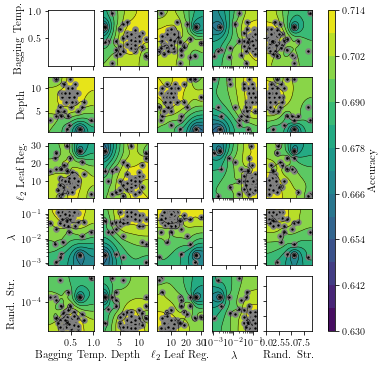

In [113]:
axes = plot_contour(study)
plt.savefig(f"../reports/Graphs/{study_id}-hyperparam-search-space.pdf", bbox_inches="tight")

In [ ]:
# visualize learning curves
with open(Path(model_dir,model_name[:-4]+"_training.json"), 'r') as j:
     contents = json.loads(j.read())
    
# extract relevant keys
iterations = contents.get("iterations")
test_metrics = [d['name'] for d in contents['meta']['test_metrics'] ]
test_results = [d['test'] for d in iterations]
learn_metrics = [d['name'] for d in contents['meta']['learn_metrics'] ]
learn_results = [d['learn'] for d in iterations]

metrics_learn = pd.DataFrame(learn_results, columns=learn_metrics).add_prefix("learn_")
metrics_test = pd.DataFrame(test_results, columns=test_metrics).add_prefix("test_")

learning_metrics = pd.concat([metrics_learn, metrics_test], axis=1)

In [ ]:
learning_metrics.plot(kind="line", figsize=(6*CM,8*CM), grid=False)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay

# model = "xl3n4thc_CatBoostClassifier_default.cbm:v9"
# model_name = model.split("/")[-1].split(":")[0]

# artifact = run.use_artifact(model)
# model_dir = artifact.download()

# clf = CatBoostClassifier()
# clf.load_model(fname=Path(model_dir, model_name))

# RocCurveDisplay.from_estimator(
# clf, X_test, y_test, response_method="predict_proba")

# plt.plot([0, 1], [0, 1], 'k--', label="random")

# plt.show()

# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import PrecisionRecallDisplay

# PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, pos_label=clf.classes_[1])
# plt.show()


# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# plt.show()